<a href="https://colab.research.google.com/github/SamEngComp/TrabalhoCalculoNumerico01/blob/main/Trabalho_computacional_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho computacional I
<blockquote>
    <b>Disciplina</b>: Cálculo Numérico<br>
    <b>Objetivos</b>:
        <ul>
            <li>Implementar os métodos numéricos estudados para achar raízes de equações.</li>
            <li>Resolver, analisar e apresentar soluções para vários problemas com os métodos numéricos a serem implementados.</li>
        </ul>
    <b>Data da Entrega</b>: 13/08/2024<br>
    <b>Alunos: </b>
    <ul>
        <li>Horley Alfredo dos Santos				473104</li>
        <li>Antônio Gustavo de Almeida Lemos		553091</li>
        <li>Luis Carlos Rodrigues dos Anjos			509022</li>
        <li>Samuel Sales Furtado					413384</li>
        <li>Antonio Mateus Barbosa Azevedo			470988</li>
        <li>Janielle do Nascimento Albino			510765</li>
        <li>Gabriel Richard Tavares de Oliveira		538828</li>
        <li>Noely Gomes Barroso						512262</li>
    </ul>
</blockquote>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

#a) Implementar algoritmo para calcular Q pelo método do Ponto Fixo com um Φ que converge.


In [7]:
def metodo_ponto_fixo(g, x0, tol, maxiter):
  x1 = g(x0)

  erro = abs(x1-x0)/abs(x1)

  verro = []
  vraiz = []
  vphi = []
  it = 1

  verro.append(erro)
  vraiz.append(x0)
  vphi.append(x1)

  while erro > tol and it < maxiter:
    x0 = x1
    x1 = g(x0)

    erro = abs(x1-x0)/abs(x1)

    verro.append(erro)
    vraiz.append(x0)
    vphi.append(x1)

    it = it+1

  return(x1, vraiz, vphi, verro)

#b)  Implementar algoritmo para calcular Q pelo método de Newton modificado.

In [8]:
def metodo_newton_raphson(f, g, x0, tol, maxiter):
  x1 = x0 - (f(x0)/g(x0))
  erro = abs(x1-x0)/abs(x1)

  vraiz_x0 = []
  vraiz_x1 = []
  vfuncao = []
  vderivada = []
  verro = []

  it = 1

  vraiz_x0.append(x0)
  vraiz_x1.append(x1)
  vfuncao.append(f(x0))
  vderivada.append(g(x0))
  verro.append(erro)


  while erro > tol and it < maxiter:
    x0 = x1
    x1 = x0 - (f(x0)/g(x0))

    erro = abs(x1-x0)/abs(x1)

    vraiz_x0.append(x0)
    vraiz_x1.append(x1)
    vfuncao.append(f(x0))
    vderivada.append(g(x0))
    verro.append(erro)

    it = it+1

  return(x1, vraiz_x0, vraiz_x1, vfuncao, vderivada, verro)

#c)  Implementar algoritmo para calcular Q pelo método da Secante original.

In [9]:
def metodo_secante(f, x0, x1, tol, max_iter):
  fle = (f(x1)-f(x0))/(x1-x0)
  x2 = x1 - f(x1)/fle

  erro = abs(x2-x1)/abs(x1)

  vraiz_x1 = []
  vraiz_x2 = []
  vfuncao_x1 = []
  vfuncao_x2 = []
  verro = []

  vraiz_x1.append(x0)
  vraiz_x2.append(x1)
  vfuncao_x1.append(f(x0))
  vfuncao_x2.append(f(x1))
  verro.append(erro)

  it = 1

  while erro > tol and it < max_iter:
    x0 = x1
    x1 = x2

    fle = (f(x1)-f(x0))/(x1-x0)
    x2 = x1 - f(x1)/fle

    erro = abs(x2-x1)/abs(x1)

    vraiz_x1.append(x0)
    vraiz_x2.append(x1)
    vfuncao_x1.append(f(x0))
    vfuncao_x2.append(f(x1))
    verro.append(erro)

    it=it+1

  return (x2, vraiz_x1, vraiz_x2, vfuncao_x1, vfuncao_x2, verro)

#d) Testar os resultados para d usando como padrão C = 1, Q0 = 0,5 e  ε = 10-4.

In [10]:
# Definindo a função f(Q)
def create_f(C):
  def f(Q):
    return C * np.exp(Q) - 4 * Q**2

  return f

In [11]:
# Definindo a derivada de f(Q)
def create_g(C):
  def g(Q):
    return (C * np.exp(Q) - 8 * Q)

  return g

###Isolamento gráfico

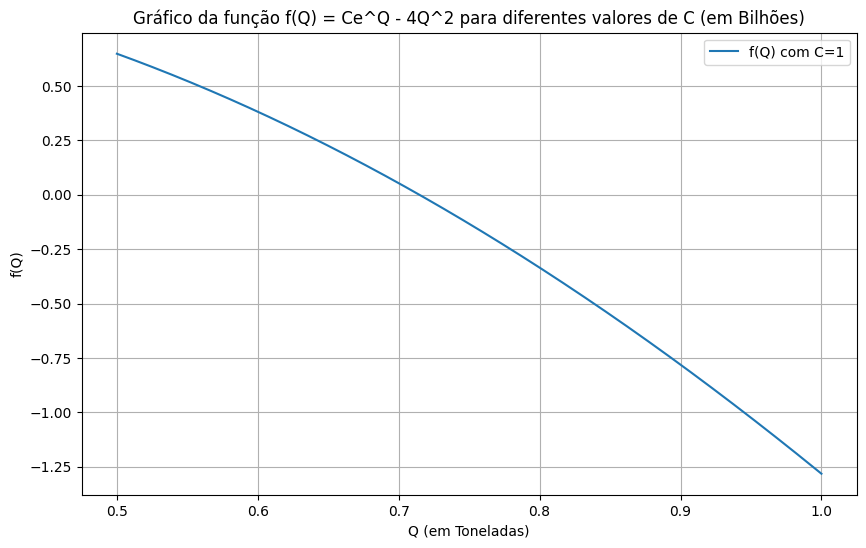

In [12]:
def isolamento_grafico(C, Q0):
  # Valores de Q (em Toneladas)
  Q = np.linspace(Q0, 1, 400)

  # Plotando a função Custo f(Q)
  plt.figure(figsize=(10, 6))

  f = create_f(C)
  plt.plot(Q, f(Q), label=f'f(Q) com C={C}')

  plt.title('Gráfico da função f(Q) = Ce^Q - 4Q^2 para diferentes valores de C (em Bilhões)')
  plt.xlabel('Q (em Toneladas)')
  plt.ylabel('f(Q)')
  plt.legend()
  plt.grid(True)
  plt.show()

# Valores de C e Q0
C = 1
Q0 = 0.5

isolamento_grafico(C, Q0)

###Isolamento analítico

In [19]:
def isolamento_analitico(C, Q0, h):
  intervalos = []

  f = create_f(C)

  while Q0 < C:
    if f(Q0) * f(Q0+h) < 0:
      intervalos.append((Q0, Q0+h))
    Q0 += h

  return intervalos

# Valores de C e Q0
C = 1
Q0 = 0.5

# Passo
h = 0.01

isolamento_analitico(C, Q0, h)

[(0.7100000000000002, 0.7200000000000002)]

###Método do ponto fixo

####Usuando φ_1(Q)

In [ ]:
def create_phi_1(C):
  def phi_1(Q):
    return (C * np.exp(Q)) / (4 * Q)
  return phi_1

In [ ]:
Q0 = 0.5
C = 1
tol = 1e-4
maxiter = 100

start_time = time.time()
[raiz_ponto_fixo_com_phi1, raizes, phis, erros] = metodo_ponto_fixo(create_phi_1(C), Q0, tol, maxiter)
end_time = time.time()

tempo_execucao_ponto_fixo_com_phi1 = end_time - start_time

# Exibir a raiz encontrada
print(f'Raiz encontrada Q = {raiz_ponto_fixo_com_phi1}\n')

# Criar DataFrame
data = {
    'Raizes Xi': raizes,
    'Phi g(Xi)': phis,
    'Erros': erros
}

df_ponto_fixo_com_phi1 = pd.DataFrame(data)

Raiz encontrada Q = 0.7147928115774164



####Usuando φ_3(Q)

In [ ]:
# Definindo a phi_3(Q)
def create_phi_3(C):
  def phi_3(Q):
    return (np.sqrt(C * np.exp(Q))) / 2
  return phi_3

In [ ]:
Q0 = 0.5
C = 1
tol = 1e-4
maxiter = 100

start_time = time.time()
[raiz_ponto_fixo_com_phi3, raizes, phis, erros] = metodo_ponto_fixo(create_phi_3(C), Q0, tol, maxiter)
end_time = time.time()

tempo_execucao_ponto_fixo_com_phi3 = end_time - start_time

# Exibir a raiz encontrada
print(f'Raiz encontrada Q = {raiz_ponto_fixo_com_phi3}\n')

# Criar DataFrame
data = {
    'Raizes Xi': raizes,
    'Phi g(Xi)': phis,
    'Erros': erros
}

df_ponto_fixo_com_phi3 = pd.DataFrame(data)

Raiz encontrada Q = 0.7147870681684868



###Método de Newton

In [ ]:
Q0 = 0.5
C = 1
tol = 1e-4
maxiter = 100

start_time = time.time()
[raiz_newton_raphson, raizes_x0, raizes_x1, funcoes, derivadas, erros] = metodo_newton_raphson(create_f(C), create_g(C), Q0, tol, maxiter)
end_time = time.time()

tempo_execucao_newton_raphson = end_time - start_time

# Exibir a raiz encontrada
print(f'Raiz encontrada Q = {raiz_newton_raphson}\n')

# Criar DataFrame
data = {
    'Raizes Xi': raizes_x0,
    'Funcoes F(Xi)': funcoes,
    'Derivadas dF(Xi)': derivadas,
    'Raizes Xi+1': raizes_x1,
    'Erros': erros
}

df_newton_raphson = pd.DataFrame(data)

Raiz encontrada Q = 0.7148059123914456



###Método da Secante

In [ ]:
Q0 = 0.5
Q = 1
C = 1
tol = 1e-4
maxiter = 100


start_time = time.time()
[raiz_secante, raizes_x1, raizes_x2, funcoes_x1, funcoes_x2, erros] = metodo_secante(create_f(C), Q0, Q, tol, maxiter)
end_time = time.time()

tempo_execucao_secante = end_time - start_time
# Exibir a raiz encontrada
print(f'Raiz encontrada Q = {raiz_secante}\n')

# Criar DataFrame
data = {
    'Raizes (X_k-1)': raizes_x1,
    'Raizes (X_k)': raizes_x2,
    'Funcoes f(X_k-1)': funcoes_x1,
    'Funcoes f(X_k)': funcoes_x2,
    'Erros': erros
}

df_secante = pd.DataFrame(data)

print(df_secante['Erros'])

Raiz encontrada Q = 0.7148059116307847

0    0.331976
1    0.056786
2    0.013033
3    0.000498
4    0.000004
Name: Erros, dtype: float64


#e) Fornecer um quadro resposta, com Q calculado para cada método dado (comparando resposta, acurácia(erro), tempo, número de iterações etc).

###Ponto fixo

####Usuando φ_1(Q)

In [ ]:
print(f'Raiz encontrada para o método do Ponto Fixo com phi_1 Q = {raiz_ponto_fixo_com_phi1}\n')
print(f'Tempo de execução do método do Ponto Fixo com phi_1: {tempo_execucao_ponto_fixo_com_phi1} segundos\n\n')
df_ponto_fixo_com_phi1

Raiz encontrada para o método do Ponto Fixo com phi_1 Q = 0.7147928115774164

Tempo de execução do método do Ponto Fixo com phi_1: 0.00012087821960449219 segundos




,Raizes Xi,Phi g(Xi),Erros
0,0.500000,0.824361,0.393469
1,0.824361,0.691573,0.192008
2,0.691573,0.721852,0.041947
3,0.721852,0.712834,0.012652
4,0.712834,0.715371,0.003548
5,0.715371,0.714645,0.001017
6,0.714645,0.714852,0.000290
7,0.714852,0.714793,0.000083


####Usuando φ_3(Q)

In [ ]:
print(f'Raiz encontrada para o método do Ponto Fixo com phi_3 Q = {raiz_ponto_fixo_com_phi3}\n')
print(f'Tempo de execução do método do Ponto Fixo com phi_3: {tempo_execucao_ponto_fixo_com_phi3} segundos\n\n')
df_ponto_fixo_com_phi3

Raiz encontrada para o método do Ponto Fixo com phi_3 Q = 0.7147870681684868

Tempo de execução do método do Ponto Fixo com phi_3: 0.0002205371856689453 segundos




,Raizes Xi,Phi g(Xi),Erros
0,0.500000,0.642013,0.221199
1,0.642013,0.689257,0.068544
2,0.689257,0.705733,0.023345
3,0.705733,0.711570,0.008204
4,0.711570,0.713650,0.002915
5,0.713650,0.714393,0.001039
6,0.714393,0.714658,0.000371
7,0.714658,0.714753,0.000133
8,0.714753,0.714787,0.000047


###Newton Raphson

In [ ]:
print(f'Raiz encontrada para o método de Newton Raphson Q = {raiz_newton_raphson}\n')
print(f'Tempo de execução do método do Ponto Fixo com phi_3: {tempo_execucao_newton_raphson} segundos\n\n')
df_newton_raphson

Raiz encontrada para o método de Newton Raphson Q = 0.7148059123914456

Tempo de execução do método do Ponto Fixo com phi_3: 0.00021696090698242188 segundos




,Raizes Xi,Funcoes F(Xi),Derivadas dF(Xi),Raizes Xi+1,Erros
0,0.500000,0.648721,-2.351279,0.775901,0.355588
1,0.775901,-0.235543,-4.034662,0.717522,0.081363
2,0.717522,-0.010002,-3.690826,0.714812,0.003791
3,0.714812,-0.000022,-3.674693,0.714806,0.000008


###Secante

In [ ]:
print(f'Raiz encontrada para o método da Secante Q = {raiz_secante}\n')
print(f'Tempo de execução do método da Secante: {tempo_execucao_secante} segundos\n\n')
df_secante

Raiz encontrada para o método da Secante Q = 0.7148059116307847

Tempo de execução do método da Secante: 0.00015926361083984375 segundos




,Raizes (X_k-1),Raizes (X_k),Funcoes f(X_k-1),Funcoes f(X_k),Erros
0,0.500000,1.000000,0.648721,-1.281718,0.331976
1,1.000000,0.668024,-1.281718,0.165354,0.056786
2,0.668024,0.705959,0.165354,0.032278,0.013033
3,0.705959,0.715159,0.032278,-0.001300,0.000498
4,0.715159,0.714803,-0.001300,0.000009,0.000004


#f) Fornecer um quadro comparativo, com todos os dados para cada método (comparando resposta, acurácia (erro), tempo, número de iterações etc).


In [ ]:
data = {
    'Metodos': ['metodo_ponto_com_phi1', 'metodo_ponto_com_phi3', 'metodo_newton_raphson', 'metodo_secante'],
    'Raizes': [
        raiz_ponto_fixo_com_phi1,
        raiz_ponto_fixo_com_phi3,
        raiz_newton_raphson,
        raiz_secante
    ],
    'Erro': [
        df_ponto_fixo_com_phi1['Erros'].iloc[-1],
        df_ponto_fixo_com_phi3['Erros'].iloc[-1],
        df_newton_raphson['Erros'].iloc[-1],
        df_secante['Erros'].iloc[-1]
    ],
    'Tempo_execucao': [
        tempo_execucao_ponto_fixo_com_phi1,
        tempo_execucao_ponto_fixo_com_phi3,
        tempo_execucao_newton_raphson,
        tempo_execucao_secante
    ],
    'Numero_iteracoes': [
        len(df_ponto_fixo_com_phi1),
        len(df_ponto_fixo_com_phi3),
        len(df_newton_raphson),
        len(df_secante)
    ]
}

df_resultados = pd.DataFrame(data)
df_resultados

,Metodos,Raizes,Erro,Tempo_execucao,Numero_iteracoes
0,metodo_ponto_com_phi1,0.714793,0.000083,0.000121,8
1,metodo_ponto_com_phi3,0.714787,0.000047,0.000221,9
2,metodo_newton_raphson,0.714806,0.000008,0.000217,4
3,metodo_secante,0.714806,0.000004,0.000153,5


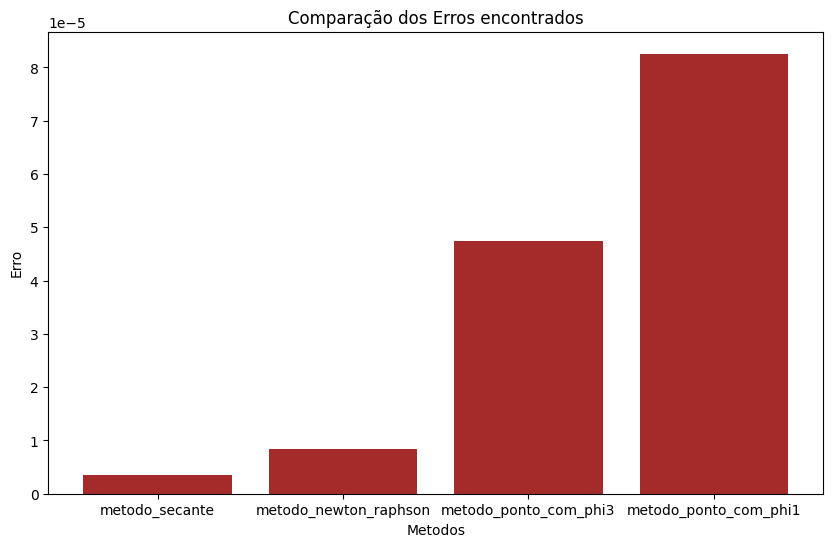

In [ ]:
df_resultados_erro = df_resultados.sort_values(by='Erro')

# Plot comparando os Erros encontrados
plt.figure(figsize=(10, 6))
plt.bar(df_resultados_erro['Metodos'], df_resultados_erro['Erro'], color='brown')
plt.xlabel('Metodos')
plt.ylabel('Erro')
plt.title('Comparação dos Erros encontrados')
plt.show()

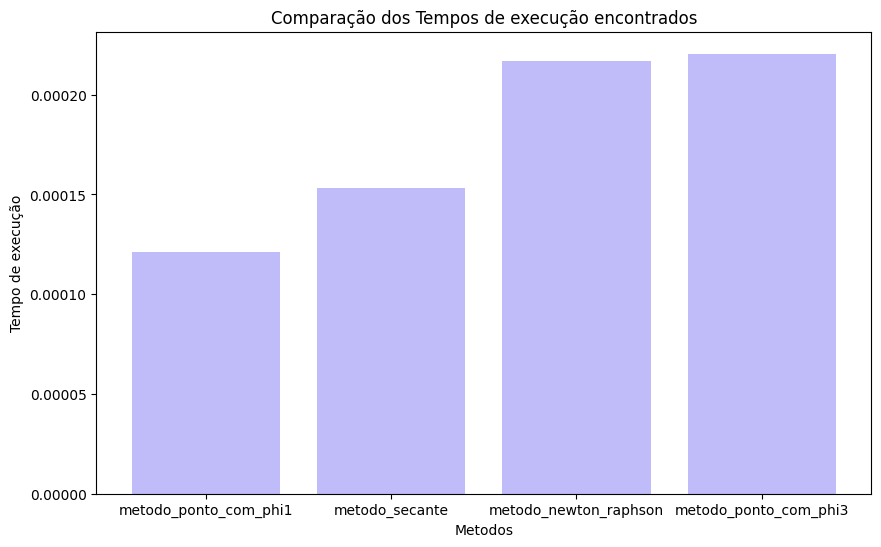

In [ ]:
df_resultados_tempo_execucao = df_resultados.sort_values(by='Tempo_execucao')

# Plot comparando os Erros encontrados
plt.figure(figsize=(10, 6))
plt.bar(df_resultados_tempo_execucao['Metodos'], df_resultados_tempo_execucao['Tempo_execucao'], color='#C0BBF9')
plt.xlabel('Metodos')
plt.ylabel('Tempo de execução')
plt.title('Comparação dos Tempos de execução encontrados')
plt.show()

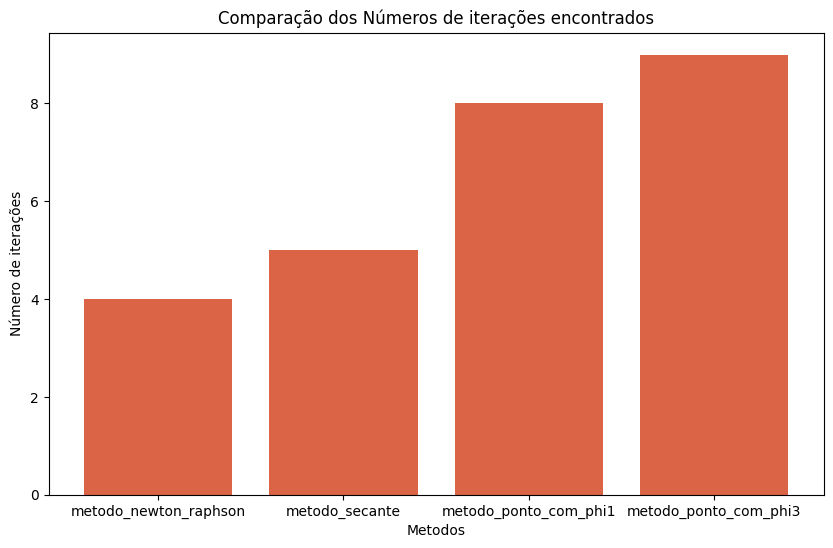

In [ ]:
df_resultados_numero_iteracoes = df_resultados.sort_values(by='Numero_iteracoes')

# Plot comparando os Erros encontrados
plt.figure(figsize=(10, 6))
plt.bar(df_resultados_numero_iteracoes['Metodos'], df_resultados_numero_iteracoes['Numero_iteracoes'], color='#DB6446')
plt.xlabel('Metodos')
plt.ylabel('Número de iterações')
plt.title('Comparação dos Números de iterações encontrados')
plt.show()

#g) Analisar o efeito da variação do valor de C (diferentes fornecedores) para cada método considerado(comparando resposta, acurácia (erro), tempo, número de iterações etc).
**Dados de entrada**: n (número de valores de C), C (para cada n) e ε (precisão).<br>
**Dados de saída**: quadros resposta (com Q e erro para cada C e método) e comparativo.

In [4]:
# Entradas
n = int(input('Digite o número de valores de C: '))
C_values = []
for i in range(0, n):
  C_values.append(float(input(f'Digite o valor de C{i}: ')))

Digite o número de valores de C: 3
Digite o valor de C0: 1
Digite o valor de C1: 2
Digite o valor de C2: 3
[1.0, 2.0, 3.0]


In [21]:
# Isolamento
C = 1
Q0 = 0.5
h = 0.01

intervalos = []
for C in C_values:
  intervalos.append(isolamento_analitico(C, Q0, h))
  if len(intervalos[-1]) == 0:
    print('Não a troca de sinal')
  else:
    print(intervalos[-1])

[(0.7100000000000002, 0.7200000000000002)]
[(1.4800000000000009, 1.4900000000000009)]
Não a troca de sinal
